# (NYC) Airbnb: Exploratory Data Analysis (EDA).

# Prerequisites:

#### Importing the Python Libraries:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
sns.set(rc={"figure.figsize":(12, 7)}, style="darkgrid", context="paper", font_scale=1.4)

#### Importing the Data:

In [5]:
airbnb = pd.read_csv("Desktop/AB_NYC_2019.csv", usecols=[*range(0, 16)])
airbnb.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


#### Summary of Dataset:

In [6]:
print("Rows     : {}".format(airbnb.shape[0]))
print("Columns  : {}".format(airbnb.shape[1]))
print("\nFeatures : {}".format(airbnb.columns.tolist()))
print("\nMissing values : {}".format(airbnb.isnull().values.sum()))
print("\nUnique values : \n{}".format(airbnb.nunique()))

Rows     : 48895
Columns  : 16

Features : ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing values : 20141

Unique values : 
id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


# PART A: (Data Cleaning).

#### TASK 1 – Drop (redundant/unnecessary) Columns from the DataFrame.

In [7]:
# -> Dropped ["id", "name", "host_name"] not only because they're (insignificant), but also for (ethical) reasons!
airbnb.drop(["id", "name", "host_name", "last_review"], axis=1, inplace=True)

#### TASK 2 – Deal with Missing Values.

In [8]:
# -> Replaced NAN values for ["reviews_per_month"] with 0!
airbnb[airbnb.isna().any(axis=1)]
airbnb.fillna({"reviews_per_month":0}, inplace=True)

#### TASK 3 – Scrub for Duplicate data, if any. Removing duplicates to get a (clean) Dataset.

In [9]:
# -> Fortunately, there weren't any Duplicates in our DataFrame!
airbnb.duplicated().sum()
airbnb.drop_duplicates(keep="first", inplace=True)

#### TASK 4 – Validate if Columns are of the (correct) Type.

In [10]:
# -> Everything looks good :)
airbnb.dtypes

host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# PART B: (Data Exploration & Visualization).

#### QUESTION 1 – Top 10 (hosts) for Listings?

In [11]:
top_10_hosts = airbnb.host_id.value_counts()
print(top_10_hosts.head(10))

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64


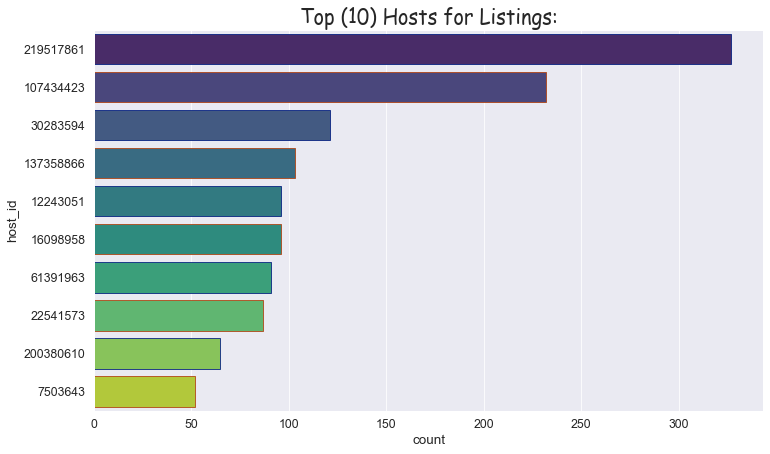

In [12]:
plt.title("Top (10) Hosts for Listings:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
sns.countplot(y=airbnb.host_id, order=top_10_hosts.index[:10], edgecolor=sns.color_palette("dark", 2), palette="viridis", data=airbnb);

In [13]:
# -> '219517861' has the (most) listings on Airbnb followed by '107434423' then '30283594'.

#### QUESTION 2 – Most (reviewed) hosts on Airbnb?

In [14]:
most_reviewed = airbnb.groupby("host_id")["number_of_reviews"].sum()
print(most_reviewed.sort_values(ascending=False).head(5))

host_id
37312959    2273
344035      2205
26432133    2017
35524316    1971
40176101    1818
Name: number_of_reviews, dtype: int64


In [15]:
# -> (Most) reviewed host is '37312959' followed by '344035' then '26432133'.

#### QUESTION 3 – Most (reviewed) hosts (per-month)?

In [16]:
most_reviewed_per_month = airbnb.groupby("host_id")["reviews_per_month"].sum()
print(most_reviewed_per_month.sort_values(ascending=False).head(5))

host_id
219517861    397.56
244361589    111.72
232251881     80.63
26432133      68.02
137274917     62.89
Name: reviews_per_month, dtype: float64


In [17]:
# -> (Most) reviewed host (per-month) on Airbnb is '219517861' followed by '244361589' then '232251881'.

#### QUESTION 4 – Top 3 (neighbourhood groups) on Airbnb?

In [22]:
top_3_neighbourhood_groups = airbnb.neighbourhood_group.value_counts()
print(top_3_neighbourhood_groups.head(3))

Manhattan    21661
Brooklyn     20104
Queens        5666
Name: neighbourhood_group, dtype: int64


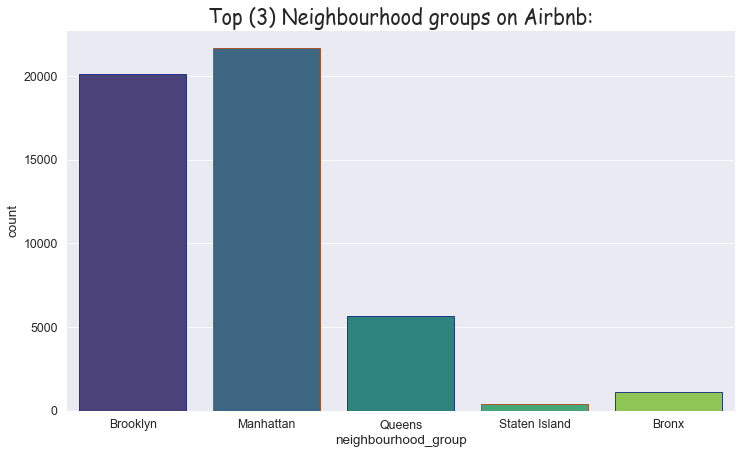

In [23]:
plt.title("Top (3) Neighbourhood groups on Airbnb:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
sns.countplot(airbnb.neighbourhood_group, edgecolor=sns.color_palette("dark", 2), palette="viridis", data=airbnb);

In [24]:
# -> Most Airbnb listings are in Manhattan followed by Brooklyn then Queens!
# -> Bronx and Staten Island aren't very popular locations!

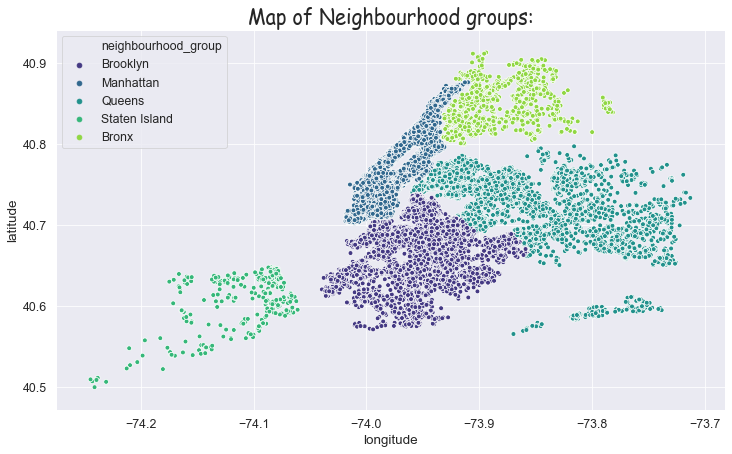

In [25]:
plt.title("Map of Neighbourhood groups:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
sns.scatterplot(airbnb.longitude, airbnb.latitude, hue=airbnb.neighbourhood_group, palette="viridis", data=airbnb);

In [26]:
# -> Manhattan and Brooklyn have the (highest) share of listings, which are 'tightly coupled'.

#### QUESTION 5 – Relation of (Neighbourhood groups) with category (Room type)?

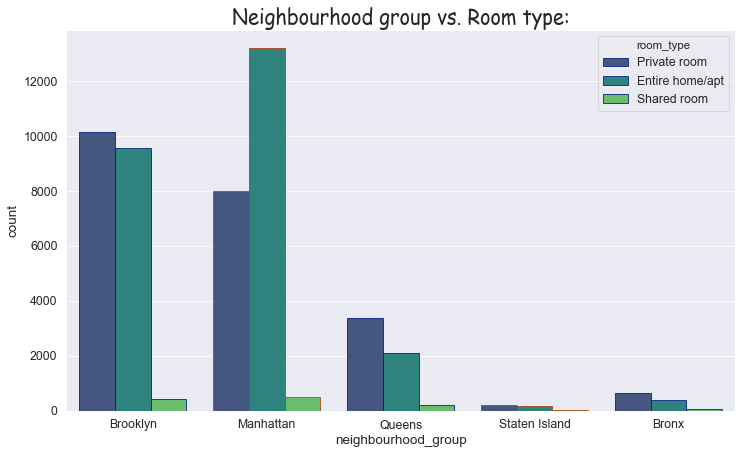

In [27]:
plt.title("Neighbourhood group vs. Room type:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
sns.countplot(airbnb.neighbourhood_group, hue=airbnb.room_type, edgecolor=sns.color_palette("dark", 2), palette="viridis", data=airbnb);

In [28]:
# -> Entire Home/Apartment are listed mostly in (Manhattan).
# -> Private Rooms and Entire home/apt in (Brooklyn) are almost Equal.
# -> No Shared Rooms listed in (Staten Island), but very few available in (Bronx).

#### QUESTION 6 – Price distribution for each (Neighbourhood group)?

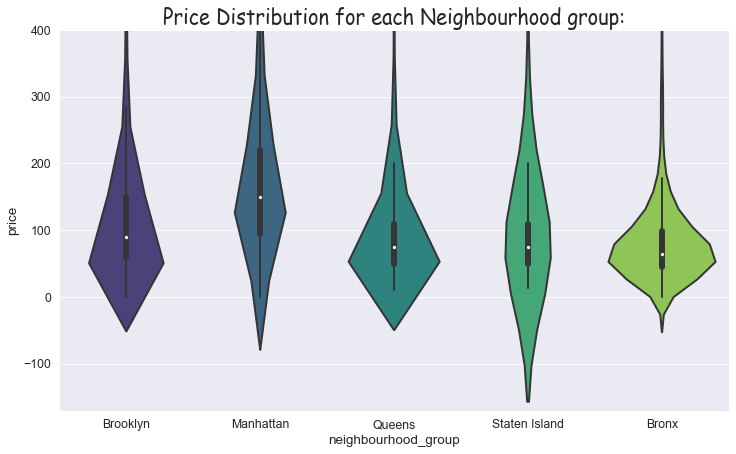

In [30]:
plt.title("Price Distribution for each Neighbourhood group:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
sns.violinplot(airbnb.neighbourhood_group, airbnb.price, palette="viridis", linewidth=2, data=airbnb);
plt.ylim(-170, 400);

In [31]:
# -> Manhattan is the most expensive (no secret), average cost of ($150/per night) followed by Brooklyn with ($90/per night).
# -> Queens and Staten Island appear to have very similar distributions ($80/per night).
# -> Bronx is the cheapest of them all ($70/per night).

In [32]:
print("(Average) price per night : ${}".format(round(airbnb.price.mean(), 2)))
print("(Maximum) price per night : ${}".format(airbnb.price.max()))
print("(Minimum) price per night : ${}".format(airbnb.price.min()))

(Average) price per night : $152.72
(Maximum) price per night : $10000
(Minimum) price per night : $0


In [33]:
# -> Wow there are some free houses? GOD IS GOOD!

In [34]:
airbnb[airbnb.price == 0]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26259,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0
26841,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333


#### QUESTION 7 – Price distribution for each (Room type – Private room, Entire home/apt, Shared room)?

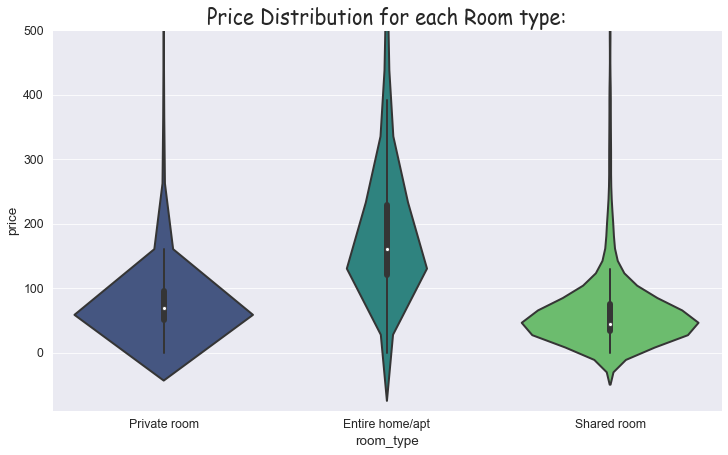

In [35]:
plt.title("Price Distribution for each Room type:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
sns.violinplot(airbnb.room_type, airbnb.price, palette="viridis", linewidth=2, data=airbnb);
plt.ylim(-90, 500);

In [36]:
# -> Entire home/apt is the most expensive (again, no secret), average cost of ($160/per night) followed by Private room with ($60/per night).
# -> Shared room is the cheapest of them all ($40/per night).

#### QUESTION 8 – Minumum nights distribution for each (Room type – Private room, Entire home/apt, Shared room)?

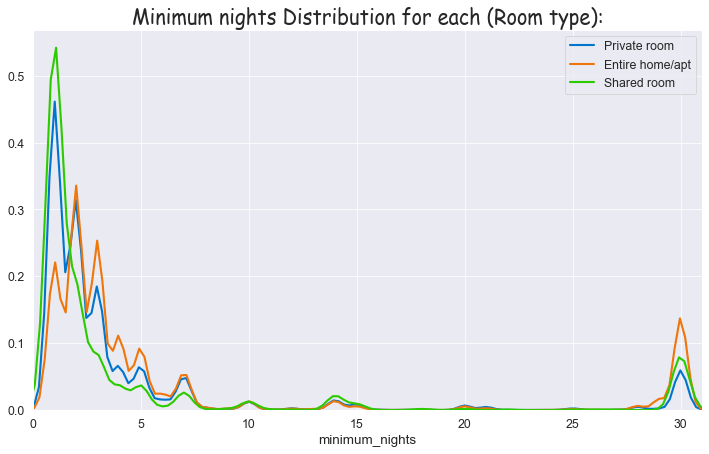

In [37]:
plt.title("Minimum nights Distribution for each (Room type):", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
sns.distplot(airbnb[(airbnb.room_type == "Private room") & (airbnb.minimum_nights > 0) & (airbnb.minimum_nights <= 30)]["minimum_nights"], hist=False, bins=31, kde_kws={"linewidth": 2.1, "color":"#0075CB", "label":"Private room"});
sns.distplot(airbnb[(airbnb.room_type == "Entire home/apt") & (airbnb.minimum_nights > 0) & (airbnb.minimum_nights <= 30)]["minimum_nights"], hist=False, bins=31, kde_kws={"linewidth": 2.1, "color":"#EE760B", "label":"Entire home/apt"});
sns.distplot(airbnb[(airbnb.room_type == "Shared room") & (airbnb.minimum_nights > 0) & (airbnb.minimum_nights <= 30)]["minimum_nights"], hist=False, bins=31, kde_kws={"linewidth": 2.1, "color":"#2BCB00", "label":"Shared room"});
plt.xlim(0, 31);

In [38]:
# -> Private rooms & Entire home/apt are usually booked for between (1–3 Nights).
# -> Entire home/apt are usually booked for between (1–3 Nights) also.
# -> Shared rooms are usually booked for (1–2 Nights) max.

#### QUESTION 9 – Availability in (Year) distribution for each (Room type – Private room, Entire home/apt, Shared room)?

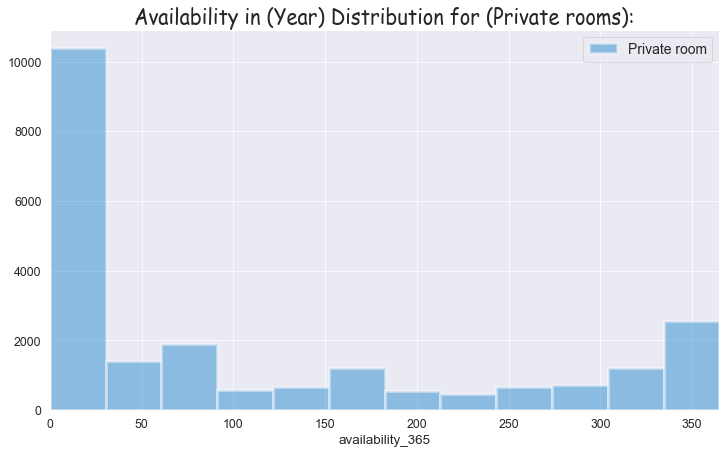

In [40]:
plt.title("Availability in (Year) Distribution for (Private rooms):", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
sns.distplot(airbnb[(airbnb.room_type == "Private room")]["availability_365"], bins=12, kde=False, hist_kws={"color":"#0075CB", "linewidth":3, "label":"Private room"});
plt.xlim(0, 365);
plt.legend(prop={"size": 14});

In [41]:
# -> Private rooms are available in (January), but are in (short) supply throughtout the (rest) of the year.

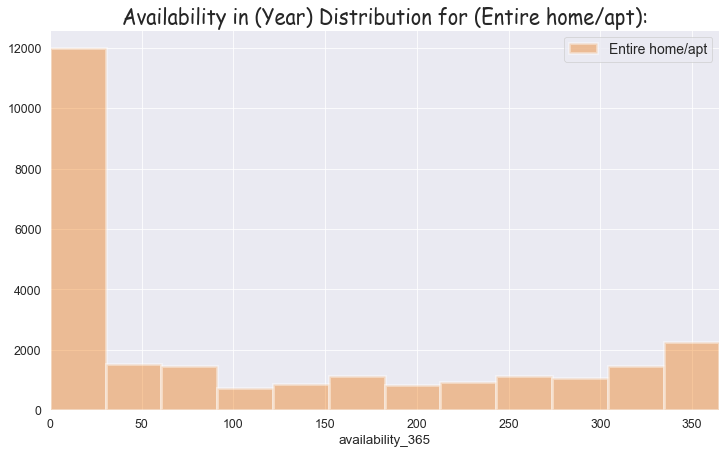

In [42]:
plt.title("Availability in (Year) Distribution for (Entire home/apt):", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
sns.distplot(airbnb[(airbnb.room_type == "Entire home/apt")]["availability_365"], bins=12, kde=False, hist_kws={"color":"#EE760B", "linewidth":3, "label":"Entire home/apt"});
plt.xlim(0, 365);
plt.legend(prop={"size": 14});

In [43]:
# -> Entire home/apt are also available in (January), but are in (short) supply throughtout the (rest) of the year.

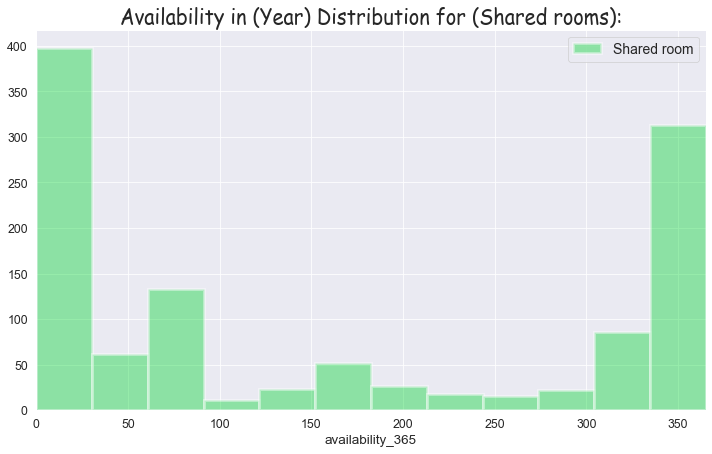

In [44]:
plt.title("Availability in (Year) Distribution for (Shared rooms):", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
sns.distplot(airbnb[(airbnb.room_type == "Shared room")]["availability_365"], bins=12, kde=False, hist_kws={"color":"#00D530", "linewidth":3, "label":"Shared room"});
plt.xlim(0, 365);
plt.legend(prop={"size": 14});

In [45]:
# -> Shared rooms are available (throughtout) the year, but only few available from (April – October).
# -> Hypothesis: Mostly travellers, backpackers and people on low budgets like to stay in the shared rooms.

#### QUESTION 10 – Plot a Correlation Matrix? Correlation between Variables?

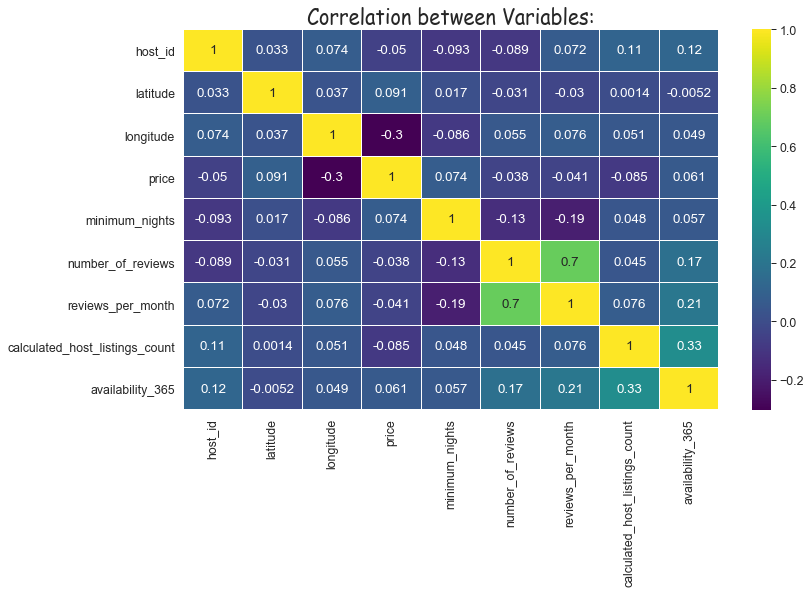

In [46]:
plt.title("Correlation between Variables:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
sns.heatmap(airbnb.corr(method="kendall"), annot=True, cmap="viridis", linewidths=0.1);

In [47]:
# -> Strong correlation in (number_of_reviews) and (reviews_per_month) only.

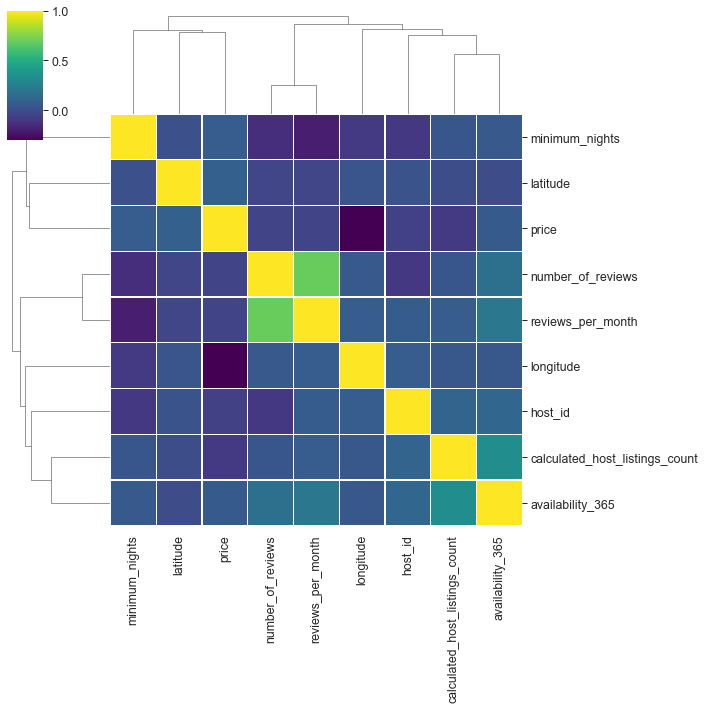

In [48]:
sns.clustermap(airbnb.corr(method="kendall"), cmap="viridis", linewidths=0.1);

### And this concludes the exploratory analysis project.

# PART C: (Bonus).
Just for learning.

In [50]:
airbnb_temp = pd.read_csv("Desktop/AB_NYC_2019.csv", usecols=[*range(0, 16)])
airbnb_temp.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [51]:
names = []

for name in airbnb_temp.name:
    names.append(name)
    
def split_name(name):
    return str(name).split()

names_count = []

for x in names:
    for word in split_name(x):
        names_count.append(word.lower())

#### BONUS QUESTION – Top 25 (words) used by hosts to (name) their listings?

In [52]:
from collections import Counter

top_25_words = Counter(names_count).most_common()
pd.DataFrame(top_25_words[0:25], columns=["Word", "Count"])

,Word,Count
0,in,16733
1,room,9389
2,bedroom,7231
3,private,6985
4,apartment,6113
5,cozy,4634
6,the,3869
7,to,3827
8,studio,3772
9,brooklyn,3629
